# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
response=requests.get(url, headers= headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
## Hint : Use the following code to extract the film urls
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
print(len(url_list))
print(url_list)

110
['https://www.justwatch.com/in/movie/chaava', 'https://www.justwatch.com/in/movie/marco-2024', 'https://www.justwatch.com/in/movie/pushpa-the-rule-part-2', 'https://www.justwatch.com/in/movie/mrs', 'https://www.justwatch.com/in/movie/sanam-teri-kasam', 'https://www.justwatch.com/in/movie/game-changer-2023', 'https://www.justwatch.com/in/movie/anora', 'https://www.justwatch.com/in/movie/mufasa-the-lion-king', 'https://www.justwatch.com/in/movie/365-days', 'https://www.justwatch.com/in/movie/untitled-murad-khetani-varun-dhawan-project', 'https://www.justwatch.com/in/movie/sankrathiki-vasthunam', 'https://www.justwatch.com/in/movie/deva-2024', 'https://www.justwatch.com/in/movie/the-gorge', 'https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/daaku-maharaaj', 'https://www.justwatch.com/in/movie/mon-potongo', 'https://www.justwatch.com/in/movie/max-2024', 'https://www.justwatch.com/in/movie/kraven-the-hunter', 'https://www.justwatch.com/in/movie/identity-20

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
def scrape_movie_title(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    title_element = soup.find('h1').text.strip()
    if title_element:
        return title_element
    else:
        return None  # Or handle the case where title is not found
movie_titles = []
for movie_url in url_list:
  title = scrape_movie_title(movie_url)
  if title:
      movie_titles.append(title)
print(len(movie_titles))
movie_titles

110


['Chhaava (2025)',
 'Marco (2024)',
 'Pushpa: The Rule - Part 2 (2024)',
 'Mrs. (2023)',
 'Sanam Teri Kasam (2016)',
 'Game Changer (2025)',
 'Anora (2024)',
 'Mufasa: The Lion King (2024)',
 '365 Days (2020)',
 'Baby John (2024)',
 'Sankrathiki Vasthunam (2025)',
 'Deva (2025)',
 'The Gorge (2025)',
 'Stree 2: Sarkate Ka Aatank (2024)',
 'Daaku Maharaaj (2025)',
 'Mon Potongo (2024)',
 'Max (2024)',
 'Kraven the Hunter (2024)',
 'Identity (2025)',
 'VidaaMuyarchi (2025)',
 'The Substance (2024)',
 'Interstellar (2014)',
 'The Wild Robot (2024)',
 'Nosferatu (2024)',
 'Sky Force (2025)',
 'Rekhachithram (2025)',
 'Dhoom Dhaam (2025)',
 'Babygirl (2024)',
 'Tumbbad (2018)',
 'Venom: The Last Dance (2024)',
 'The Brutalist (2024)',
 'Deadly Virtues: Love. Honour. Obey. (2014)',
 'Companion (2025)',
 'Lucky Baskhar (2024)',
 'Conclave (2024)',
 'The Mehta Boys (2024)',
 'Sookshma Darshini (2024)',
 'The Order (2024)',
 'The Count of Monte-Cristo (2024)',
 'The Gangster, the Cop, the Devil

## **Scrapping release Year**

In [ ]:
# Write Your Code here
#import time
movie_release_years=[]
for url in url_list:
  try:
    response=requests.get(url,headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    year=soup.find_all('span',class_='release-year')[0].text.strip('()')
  except:
    year='NA'
  movie_release_years.append(year)
  #time.sleep(1)
print(movie_release_years)
print(len(movie_release_years))

['2025', '2024', '2024', '2023', '2016', '2025', '2024', '2024', '2020', '2024', '2025', '2025', '2025', '2024', '2025', '2024', '2024', '2024', '2025', '2025', '2024', '2014', '2024', '2024', '2025', '2025', '2025', '2024', '2018', '2024', '2024', '2014', '2025', '2024', '2024', '2024', '2024', '2024', '2024', '2019', '2025', '2024', '2025', '2025', '2024', '2021', '2024', '2024', '2025', '2024', '2024', '2024', '2025', '2024', '2024', '2024', '2024', '2013', '2016', '2024', '2024', '2024', '2015', '2024', '2024', '2024', '2025', '2025', '2013', '2023', '2024', '2024', '2024', '2018', '2008', '2024', '2022', '2021', '2015', '2015', '2012', '2024', '2024', '2024', '2000', '2024', '2008', '2024', '2019', '2025', '2024', '2024', '2021', '2022', '2017', '2019', '2025', '2024', '2023', '2024', '2025', '2024', '2024', '2023', '2016', '2025', '2025', '2005', '1950', '2024']
110


## **Scrapping Genres**

In [ ]:
# Write Your Code here
movie_genre = []
for url in url_list:
    try:
      response = requests.get(url, headers=headers)
      soup = BeautifulSoup(response.text, 'html.parser')
      for x in soup.find_all('div', class_='poster-detail-infos'):
          if x.find_all('h3')[0].text == 'Genres':
            genre = x.find_all('span')[0].text
    except:
        genre = 'NA'
    movie_genre.append(genre)
print(len(movie_genre))
print(movie_genre)

110
['Drama, History, Action & Adventure', 'Action & Adventure, Crime, Mystery & Thriller', 'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama, Comedy', 'Drama, Romance', 'Drama, Action & Adventure, Mystery & Thriller', 'Comedy, Drama, Romance', 'Animation, Drama, Kids & Family, Fantasy, Action & Adventure', 'Drama, Romance, Made in Europe', 'Drama, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Comedy', 'Action & Adventure, Mystery & Thriller, Crime', 'Romance, Mystery & Thriller, Horror, Science-Fiction, Action & Adventure', 'Comedy, Horror', 'Drama, Action & Adventure', 'Drama, Romance', 'Action & Adventure', 'Action & Adventure, Mystery & Thriller', 'Action & Adventure, Crime, Mystery & Thriller', 'Mystery & Thriller, Action & Adventure', 'Drama, Horror, Science-Fiction', 'Drama, Science-Fiction, Action & Adventure', 'Animation, Science-Fiction, Kids & Family', 'Fantasy, Horror', 'Action & Adventure, Mystery & Thriller', 'Mystery & Thriller, Drama', 'Acti

## **Scrapping IMBD Rating**

In [ ]:
imbd_scores = []
#imbd_score=[]
for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        for x in soup.find_all('div'):
            imbd_score=soup.find_all('span', class_='imdb-score')[0].text.strip().split()[0]
    except:
        imbd_score = 'NA'
    imbd_scores.append(imbd_score)
print(len(imbd_scores))
print(imbd_scores)

110
['8.0', '7.0', '6.2', '6.8', '7.6', '5.6', '7.7', '6.6', '3.3', '5.5', '6.5', '7.5', '6.8', '6.9', '6.0', '8.0', '7.2', '5.4', '7.6', '7.0', '7.3', '8.7', '8.2', '7.3', '7.3', '8.5', '6.4', '6.0', '8.2', '6.0', '7.6', '4.8', '7.0', '8.0', '7.4', '7.2', '7.8', '6.8', '7.6', '7.0', '6.2', '7.0', '6.0', '6.2', '7.1', '7.6', '6.9', '7.9', '8.1', '4.7', '5.4', '7.0', '6.6', '8.7', '6.8', '7.1', '8.1', '8.2', '8.3', '7.5', '4.8', '5.7', '4.2', '7.6', '4.6', '6.6', '7.4', '7.3', '8.2', '6.6', '7.6', '8.5', '6.0', '7.0', '7.6', '8.2', '8.2', '8.0', '6.1', '7.3', '6.5', '7.5', '8.9', '6.4', '8.5', '7.0', '7.7', '7.1', '7.4', '7.7', '5.2', '5.5', '8.1', '7.6', '4.8', '7.1', '6.2', '3.5', '6.8', '6.5', '8.0', '7.0', '6.2', '6.8', '7.6', '9.6', '2.9', '6.9', '8.4', '6.5']


## **Scrapping Runtime/Duration**

In [ ]:
import time
movie_runtime = []
for url in url_list:
  try:
    response = requests.get(url, headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='poster-detail-infos'):
       if x.find_all('h3')[0].text=='Runtime':
        runtime=x.find_all('div')[0].text
  except:
    runtime='NA'
  movie_runtime.append(runtime)
  #time.sleep(1)
print(len(movie_runtime))
print(movie_runtime)

110
['2h 41min', '2h 25min', '3h 21min', '1h 51min', '2h 34min', '2h 44min', '2h 19min', '1h 58min', '1h 54min', '2h 42min', '2h 40min', '2h 36min', '2h 7min', '2h 27min', '2h 30min', '2h 29min', '2h 12min', '2h 7min', '2h 37min', '2h 34min', '2h 21min', '2h 49min', '1h 42min', '2h 13min', '2h 5min', '2h 27min', '1h 49min', '1h 54min', '1h 53min', '1h 49min', '3h 35min', '1h 27min', '1h 37min', '2h 28min', '2h 0min', '1h 56min', '2h 22min', '1h 56min', '2h 58min', '1h 50min', '1h 58min', '1h 50min', '1h 58min', '2h 23min', '1h 58min', '2h 59min', '2h 23min', '1h 25min', '2h 33min', '2h 38min', '1h 46min', '1h 51min', '2h 32min', '1h 56min', '1h 40min', '1h 29min', '2h 30min', '2h 59min', '2h 41min', '2h 42min', '2h 25min', '1h 52min', '2h 5min', '1h 44min', '2h 34min', '2h 28min', '2h 26min', '2h 7min', '3h 6min', '2h 55min', '2h 8min', '2h 47min', '2h 16min', '2h 20min', '2h 4min', '2h 47min', '2h 46min', '2h 35min', '2h 14min', '2h 38min', '1h 23min', '2h 20min', '1h 52min', '1h 50mi

## **Scrapping Age Rating**

In [ ]:
import time
movie_agerating=[]
age_rating=''
for url in url_list:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     for x in soup.find_all('div', class_='poster-detail-infos' ):
       if x.find_all('h3')[0].text=='Age rating':
        age_rating=x.find_all('div')[0].text
  except:
    age_rating='NA'
  movie_agerating.append(age_rating)
  time.sleep(1)
print(len(movie_agerating))
print(movie_agerating)

110
['', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'U', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'U', 'A', 'A', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'U', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'UA', 'UA', 'UA', 'A', 'U', 'A', 'A', 'UA', 'UA', 'A', 'A', 'A', 'UA', 'UA', 'A', 'U', 'A', 'A', 'UA', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA']


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
Production_countries = []
for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        for x in soup.find_all('div', class_='poster-detail-infos'):
            if x.find('h3', class_='poster-detail-infos__subheading').text == 'Production country':
                Production_country = x.find('div', class_='poster-detail-infos__value').text
    except:
        Production_country = 'NA'
    Production_countries.append(Production_country)
print(len(Production_countries))
print(Production_countries)

110
['India', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'Poland', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom, France', 'Canada, United States, United Kingdom', 'Japan, United States', 'United States', 'India', 'India', 'India', 'Netherlands, United States', 'India, Sweden', 'United States', 'United Kingdom, United States', 'Netherlands, United Kingdom', 'United States', 'India', 'United Kingdom, United States', 'India, United States', 'India', 'United States, United Kingdom', 'France, Belgium', 'South Korea', 'United States, Spain, United Kingdom', 'Japan, United States', 'Canada, United States', 'India', 'France, Luxembourg, Netherlands, Italy, India', 'India', 'India', 'France, Latvia, Belgium', 'India', 'India', 'United States', 'United States, Canada', 'India', 'Japan', 'United States, Canada', 'United States, Poland', 'India', 'United States', 'United States

## **Fetching Streaming Service Details**

In [ ]:
movie_streaming_services = []
for url in url_list:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract 'src' and process to get the name of the streaming service
        name = [
            x['src'].split('/')[-1].split('.')[0]  # Extract the last part of the URL and remove file extension
            for x in soup.find_all('img', class_="provider-icon wide icon") if 'src' in x.attrs
        ]
    except Exception as e:
        print(f"Error for URL {url}: {e}")
        names = ['NA']
    movie_streaming_services.append(", ".join(name))
print(len(movie_streaming_services))
print(movie_streaming_services)

110
['bookmyshow, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, sonyliv, amazonprimevideo, aha', 'netflix, amazonprimevideo', 'zee5, amazonprimevideo', 'itunes, zee5, vimoviesandtv, amazonprimevideo, appletverosnow, jiohotstar, itunes, itunes, bookmyshow', 'amazonprimevideo, amazonprimevideo, zee5, amazonprimevideo, amazon', 'zee5, amazon, amazonprimevideo', 'itunes, amazon, itunes, amazonprimevideo, itunes, bookmyshow', 'netflix, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'zee5, amazonprimevideo', 'bookmyshow, amazonprimevideo', 'appletvplus, appletvplus, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'netflix, amazonprimevideo', 'amazonprimevideo', 'zee5, amazonprimevideo', 'itunes, zee5, amazon, amazonprimevideo, itunes, itunes, netflix', 'zee5, amazonprimevideo', 'netflix, bookmyshow, amazonprimevideo', 'mubi, amazonmubi, amazonprimevideo, amazon', 'amazonprimevideo, itunes, amazonprimevideo, jioh

## **Now Creating Movies DataFrame**

In [ ]:
info_dict = {
    'url': url_list,
    'title': movie_titles,
    'release_year': movie_release_years,
    'genre': movie_genre,
    'imdb_rating': imbd_scores,
    'runtime': movie_runtime,
    'age_rating': movie_agerating,
    'production_country': Production_countries,
    'streaming_service': movie_streaming_services
}
movie_data = pd.DataFrame(info_dict)
movie_data

url  \
0            https://www.justwatch.com/in/movie/chaava   
1        https://www.justwatch.com/in/movie/marco-2024   
2    https://www.justwatch.com/in/movie/pushpa-the-...   
3               https://www.justwatch.com/in/movie/mrs   
4    https://www.justwatch.com/in/movie/sanam-teri-...   
..                                                 ...   
105          https://www.justwatch.com/in/movie/hathya   
106    https://www.justwatch.com/in/movie/laila-2025-0   
107         https://www.justwatch.com/in/movie/syriana   
108  https://www.justwatch.com/in/movie/sunset-boul...   
109  https://www.justwatch.com/in/movie/the-last-sh...   

                                title release_year  \
0                      Chhaava (2025)         2025   
1                        Marco (2024)         2024   
2    Pushpa: The Rule - Part 2 (2024)         2024   
3                         Mrs. (2023)         2023   
4             Sanam Teri Kasam (2016)         2016   
..                                ...          ...   
105                     Hathya (2025)         2025   
106                      Laila (2025)         2025   
107                    Syriana (2005)         2005   
108           Sunset Boulevard (1950)         1950   
109          The Last Showgirl (2024)         2024   

                                                 genre imdb_rating   runtime  \
0                   Drama, History, Action & Adventure         8.0  2h 41min   
1        Action & Adventure, Crime, Mystery & Thriller         7.0  2h 25min   
2    Drama, Mystery & Thriller, Action & Adventure,...         6.2  3h 21min   
3                                        Drama, Comedy         6.8  1h 51min   
4                                       Drama, Romance         7.6  2h 34min   
..                                                 ...         ...       ...   
105                   Drama, Mystery & Thriller, Crime         9.6  2h 28min   
106         Romance, Comedy, Drama, Action & Adventure         2.9  2h 14min   
107                          Mystery & Thriller, Drama         6.9  1h 53min   
108                                              Drama         8.4  1h 50min   
109                                              Drama         6.5  1h 28min   

    age_rating production_country  \
0                           India   
1            A              India   
2           UA              India   
3           UA              India   
4           UA              India   
..         ...                ...   
105          A              India   
106          A              India   
107         UA      United States   
108         UA      United States   
109         UA      United States   

                                     streaming_service  
0                         bookmyshow, amazonprimevideo  
1    amazonprimevideo, amazonprimevideo, sonyliv, a...  
2                            netflix, amazonprimevideo  
3                               zee5, amazonprimevideo  
4    itunes, zee5, vimoviesandtv, amazonprimevideo,...  
..                                                 ...  
105                 amazonprimevideo, amazonprimevideo  
106                 amazonprimevideo, amazonprimevideo  
107                   amazon, amazon, amazonprimevideo  
108                   amazon, amazon, amazonprimevideo  
109                   amazon, amazon, amazonprimevideo  

[110 rows x 9 columns]

In [ ]:
# make a csv file
movie_data.to_csv('tv_data.csv')

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
# Sending an HTTP GET request to the URL
response=requests.get(tv_url, headers=headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
tv_show_links=[]
# Find all elements containing TV show links (adjust selector if needed)
for x in soup.find_all('a', class_="title-list-grid__item--link"):
# Extract the href attributes to get the URLs
 tv_show_links.append('https://www.justwatch.com'+x['href'])
# Print the extracted URLs and their count
print(tv_show_links)
print(len(tv_show_links))

['https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/paatal-lok', 'https://www.justwatch.com/in/tv-show/the-day-of-the-jackal', 'https://www.justwatch.com/in/tv-show/squid-game', 'https://www.justwatch.com/in/tv-show/jack-reacher', 'https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/aashram', 'https://www.justwatch.com/in/tv-show/the-white-lotus', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/thukra-ke-mera-pyaar', 'https://www.justwatch.com/in/tv-show/mastram', 'https://www.justwatch.com/in/tv-show/suzhal-the-vortex', 'https://www.justwatch.com/in/tv-show/severance', 'https://www.justwatch.com/in/tv-show/paradise-2025', 'https://www.justwatch.com/in/tv-show/zero-day', 'https://www.justwatch.com/in/tv-show/dexter-original-sin', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
def scrape_tv_title(tv_url):
    response = requests.get(tv_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    title_element = soup.find('h1',class_='title-detail-hero__details__title').text.strip()
    if title_element:
        return title_element
    else:
        return None  # Or handle the case where title is not found
tv_titles = []
for tv_url in tv_show_links:
  title = scrape_tv_title(tv_url)
  if title:
      tv_titles.append(title)
print(len(tv_titles))
tv_titles

100


['Solo Leveling (2024)',
 'Paatal Lok (2020)',
 'The Day of the Jackal (2024)',
 'Squid Game (2021)',
 'Reacher (2022)',
 'From (2022)',
 'Aashram (2020)',
 'The White Lotus (2021)',
 'Game of Thrones (2011)',
 'Attack on Titan (2013)',
 'Thukra Ke Mera Pyaar (2024)',
 'Mastram (2020)',
 'Suzhal - The Vortex (2022)',
 'Severance (2022)',
 'Paradise (2025)',
 'Zero Day (2025)',
 'Dexter: Original Sin (2024)',
 'Mirzapur (2018)',
 'INVINCIBLE (2021)',
 'The Secret of the Shiledars (2025)',
 'Newtopia (2025)',
 'The Penguin (2024)',
 'Auto Shankar (2019)',
 'High Potential (2024)',
 'Farzi (2023)',
 'Cobra Kai (2018)',
 'Breaking Bad (2008)',
 'The Night Agent (2023)',
 'Naruto (2002)',
 'MTV Roadies (2003)',
 'Mismatched (2020)',
 'The Rookie (2018)',
 'Dabba Cartel (2025)',
 'Alice in Borderland (2020)',
 'Daredevil: Born Again (2025)',
 'The Pitt (2025)',
 'Naruto Shippūden (2007)',
 'Your Friendly Neighborhood Spider-Man (2025)',
 'Apharan (2018)',
 'True Detective (2014)',
 'Demon Sl

In [ ]:
import time
tvshow_title = []
for tv_url in tv_show_links:
  try:
    response = requests.get(tv_url, headers = headers)
    soup = BeautifulSoup(response.text,'html.parser')
    title=soup.find('h1',class_='title-detail-hero__details__title').text.strip()
  except:
    title='NA'
  tvshow_title.append(title)
  time.sleep(1)
print(tvshow_title)
print(len(tvshow_title))

['Solo Leveling (2024)', 'Paatal Lok (2020)', 'The Day of the Jackal (2024)', 'Squid Game (2021)', 'Reacher (2022)', 'From (2022)', 'Aashram (2020)', 'The White Lotus (2021)', 'Game of Thrones (2011)', 'Attack on Titan (2013)', 'Thukra Ke Mera Pyaar (2024)', 'Mastram (2020)', 'Suzhal - The Vortex (2022)', 'Severance (2022)', 'Paradise (2025)', 'Zero Day (2025)', 'Dexter: Original Sin (2024)', 'Mirzapur (2018)', 'INVINCIBLE (2021)', 'The Secret of the Shiledars (2025)', 'Newtopia (2025)', 'The Penguin (2024)', 'Auto Shankar (2019)', 'High Potential (2024)', 'Farzi (2023)', 'Cobra Kai (2018)', 'Breaking Bad (2008)', 'The Night Agent (2023)', 'Naruto (2002)', 'MTV Roadies (2003)', 'Mismatched (2020)', 'The Rookie (2018)', 'Dabba Cartel (2025)', 'Alice in Borderland (2020)', 'Daredevil: Born Again (2025)', 'The Pitt (2025)', 'Naruto Shippūden (2007)', 'Your Friendly Neighborhood Spider-Man (2025)', 'Apharan (2018)', 'True Detective (2014)', 'Demon Slayer: Kimetsu no Yaiba (2019)', 'Panchay

## **Fetching Release Year**

In [ ]:
# Write Your Code here
#import time
Release_Years= []
for tv_url in tv_show_links:
  try:
    response = requests.get(tv_url, headers = headers)
    soup = BeautifulSoup(response.text,'html.parser')
    title=soup.find_all('span',class_='release-year')[0].text.strip('()')
  except:
    title='NA'
  Release_Years.append(title)
  #time.sleep(1)
print(Release_Years)
print(len(Release_Years))

['2024', '2020', '2024', '2021', '2022', '2022', '2020', '2021', '2011', '2013', '2024', '2020', '2022', '2022', '2025', '2025', '2024', '2018', '2021', '2025', '2025', '2024', '2019', '2024', '2023', '2018', '2008', '2023', '2002', '2003', '2020', '2018', '2025', '2020', '2025', '2025', '2007', '2025', '2018', '2014', '2019', '2020', '2019', '2018', '2010', '2020', '2025', '2025', '2023', '2017', '2010', '2019', '2020', '2024', '2025', '2025', '2024', '2023', '2006', '2021', '2024', '2025', '2017', '2022', '2010', '2018', '2019', '2016', '2024', '2025', '2015', '2020', '2016', '2025', '2024', '2025', '2025', '2022', '2024', '2019', '2024', '2011', '2009', '2017', '2019', '2023', '2010', '2025', '2018', '2019', '2019', '2019', '2016', '2018', '2023', '2017', '2021', '2024', '2025', '2021']
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
tv_show_genre = []
for url in tv_show_links:
    try:
      response = requests.get(url, headers=headers)
      soup = BeautifulSoup(response.text, 'html.parser')
      for x in soup.find_all('div', class_='poster-detail-infos'):
          if x.find_all('h3')[0].text == 'Genres':
            genre = x.find_all('span')[0].text
    except:
        genre = 'NA'
    tv_show_genre.append(genre)
print(len(tv_show_genre))
print(tv_show_genre)

100
['Action & Adventure, Science-Fiction, Animation, Fantasy', 'Mystery & Thriller, Action & Adventure, Crime, Drama', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Drama, Mystery & Thriller', 'Drama, Action & Adventure, Mystery & Thriller, Crime', 'Drama, Horror, Science-Fiction, Mystery & Thriller', 'Mystery & Thriller, Crime, Drama', 'Comedy, Drama, Mystery & Thriller', 'Action & Adventure, Science-Fiction, Drama, Fantasy', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Drama, Romance', 'Drama, Comedy, Fantasy', 'Mystery & Thriller, Crime, Drama, Fantasy', 'Drama, Science-Fiction, Mystery & Thriller', 'Crime, Drama, Action & Adventure, Mystery & Thriller', 'Drama, Mystery & Thriller, War & Military', 'Drama, Crime', 'Action & Adventure, Drama, Crime, Mystery & Thriller', 'Science-Fiction, Action & Adventure, Drama, Animation, Fantasy, Mystery & Thriller', 'Drama, Action & Adventure', 'Action & Adventure, Science-Fiction, Fa

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
imbd_scores = []
#imbd_score=[]
for url in tv_show_links:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        for x in soup.find_all('div'):
            imbd_score=soup.find_all('span', class_='imdb-score')[0].text.strip().split()[0]
    except:
        imbd_score = 'NA'
    imbd_scores.append(imbd_score)
print(len(imbd_scores))
print(imbd_scores)

100
['8.4', '8.2', '8.2', '8.0', '8.0', '7.8', '6.6', '8.0', '9.2', '9.1', '6.6', '6.8', '8.1', '8.7', '8.0', '7.0', '8.3', '8.4', '8.6', '6.9', '6.7', '8.6', '6.8', '7.8', '8.3', '8.4', '9.5', '7.5', '8.4', '4.4', '5.9', '8.0', '7.1', '7.7', '9.0', '8.5', '8.7', '7.4', '8.2', '8.9', '8.6', '9.0', '8.3', '8.6', '9.1', '6.5', '8.0', '5.4', 'NA', '8.7', '8.5', '8.7', '6.4', '6.8', '7.6', '5.2', '8.0', '8.1', '3.6', '7.7', 'NA', '7.4', '8.2', '8.0', '5.3', '3.4', '8.6', '8.7', '8.6', '6.5', '8.6', '8.5', '8.6', '8.1', '5.7', '6.3', '7.2', '8.3', '7.7', '7.8', '8.2', '8.4', '8.5', '8.3', '8.1', '8.1', '8.1', '6.7', '4.8', '7.9', '7.6', '9.3', '8.0', '7.1', '6.2', '8.2', '8.0', '8.8', '7.9', 'NA']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
import time
tv_show_agerating=[]
for url in tv_show_links:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     for x in soup.find_all('div', class_='poster-detail-infos'):
       if x.find_all('h3')[0].text=='Age rating':
        age_rating=x.find_all('div')[0].text
  except:
    runtime='NA'
  tv_show_agerating.append(age_rating)
  time.sleep(1)
print(len(tv_show_agerating))
print(tv_show_agerating)

100
['UA', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'U', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'A', 'A', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'A', 'A', 'A', 'A']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
tvshow_productioncountries = []
for url in tv_show_links:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        for x in soup.find_all('div', class_='poster-detail-infos'):
            if x.find('h3', class_='poster-detail-infos__subheading').text == 'Production country':
                Production_country = x.find('div', class_='poster-detail-infos__value').text
    except:
        Production_country = 'NA'
    tvshow_productioncountries.append(Production_country)
print(len(tvshow_productioncountries))
print(tvshow_productioncountries)

100
['Japan', 'India', 'United Kingdom, United States', 'South Korea', 'United States', 'United States', 'India', 'United States', 'United States', 'Japan', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'South Korea', 'United States', 'India', 'United States', 'India', 'United States', 'United States', 'United States', 'Japan', 'India', 'India', 'United States', 'India', 'Japan', 'United States', 'United States', 'Japan', 'United States', 'India', 'United States', 'Japan', 'India', 'United States', 'United States', 'United Kingdom', 'Mexico', 'India', 'United States', 'China', 'Germany', 'United States', 'India', 'India', 'United States', 'Japan', 'India', 'Japan', 'India', 'India', 'United States', 'Japan', 'India', 'Spain', 'United States', 'United States', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'Japan, United States', 'South Korea', 'China', 'United Stat

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
tvshow_streaming_services = []
for url in tv_show_links:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract 'src' and process to get the name of the streaming service
        name = [
            x['src'].split('/')[-1].split('.')[0]  # Extract the last part of the URL and remove file extension
            for x in soup.find_all('img', class_="provider-icon wide icon") if 'src' in x.attrs
        ]
    except Exception as e:
        print(f"Error for URL {url}: {e}")
        names = ['NA']
    tvshow_streaming_services.append(", ".join(name))
print(len(tvshow_streaming_services))
print(tvshow_streaming_services)

100
['amazoncrunchyroll, crunchyroll, amazoncrunchyroll, amazonprimevideo, crunchyroll', 'amazonprimevideo, amazonprimevideo, amazonprimevideo, amazonprimevideo', 'jiohotstar, amazonprimevideo', 'netflix, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazonprimevideo', 'mxplayer, amazonminitv, amazonprimevideo', 'jiohotstar, amazonprimevideo', 'jiohotstar, amazonprimevideo', 'amazonprimevideo, amazonanimetimes, amazonprimevideo, amazonprimevideo', 'jiohotstar, jiohotstar, amazonprimevideo', 'vimoviesandtv, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazonprimevideo, amazonprimevideo', 'appletvplus, appletvplus, appletvplus, amazonprimevideo', 'jiohotstar, amazonprimevideo', 'netflix, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazonprimevideo', 'jiohotstar, jiohotstar, amazonprimevideo

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
import time
tv_show_runtime= []
for url in tv_show_links:
  try:
    response = requests.get(url, headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='poster-detail-infos'):
       if x.find_all('h3')[0].text=='Runtime':
        runtime=x.find_all('div')[0].text
  except:
    runtime='NA'
  tv_show_runtime.append(runtime)
  #time.sleep(1)
print(len(tv_show_runtime))
print(tv_show_runtime)

100
['24min', '44min', '51min', '57min', '48min', '51min', '42min', '1h 1min', '58min', '25min', '23min', '28min', '46min', '47min', '52min', '51min', '51min', '50min', '48min', '36min', '36min', '58min', '30min', '43min', '56min', '35min', '47min', '50min', '23min', '41min', '36min', '43min', '48min', '54min', '51min', '48min', '23min', '23min', '24min', '1h 1min', '26min', '35min', '58min', '51min', '1h 28min', '34min', '44min', '43min', '45min', '56min', '54min', '45min', '41min', '19min', '24min', '39min', '23min', '32min', '1h 13min', '58min', '3min', '31min', '55min', '40min', '40min', '44min', '1h 2min', '1h 1min', '59min', '37min', '53min', '24min', '1h 16min', '46min', '52min', '43min', '1h 2min', '1h 2min', '32min', '49min', '55min', '44min', '21min', '50min', '24min', '50min', '46min', '50min', '22min', '57min', '54min', '1h 5min', '47min', '42min', '43min', '24min', '53min', '1h 10min', '1h 6min', '44min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
info_dict = {
    'url': tv_show_links,
    'title': tvshow_title,
    'release_year': Release_Years,
    'genre': tv_show_genre,
    'imdb_rating': imbd_scores,
    'runtime': tv_show_runtime,
    'age_rating': tv_show_agerating,
    'production_country': tvshow_productioncountries,
    'streaming_service': tvshow_streaming_services,
}
tv_data=pd.DataFrame(info_dict)
tv_data

url  \
0   https://www.justwatch.com/in/tv-show/solo-leve...   
1     https://www.justwatch.com/in/tv-show/paatal-lok   
2   https://www.justwatch.com/in/tv-show/the-day-o...   
3     https://www.justwatch.com/in/tv-show/squid-game   
4   https://www.justwatch.com/in/tv-show/jack-reacher   
..                                                ...   
95  https://www.justwatch.com/in/tv-show/black-clover   
96  https://www.justwatch.com/in/tv-show/dexter-ne...   
97  https://www.justwatch.com/in/tv-show/laughter-...   
98  https://www.justwatch.com/in/tv-show/buried-he...   
99       https://www.justwatch.com/in/tv-show/mandaar   

                                            title release_year  \
0                            Solo Leveling (2024)         2024   
1                               Paatal Lok (2020)         2020   
2                    The Day of the Jackal (2024)         2024   
3                               Squid Game (2021)         2021   
4                                  Reacher (2022)         2022   
..                                            ...          ...   
95                            Black Clover (2017)         2017   
96                       Dexter: New Blood (2021)         2021   
97  Laughter Chefs Unlimited Entertainment (2024)         2024   
98                           Buried Hearts (2025)         2025   
99                                 Mandaar (2021)         2021   

                                                genre imdb_rating   runtime  \
0   Action & Adventure, Science-Fiction, Animation...         8.4     24min   
1   Mystery & Thriller, Action & Adventure, Crime,...         8.2     44min   
2   Crime, Drama, Mystery & Thriller, Action & Adv...         8.2     51min   
3       Action & Adventure, Drama, Mystery & Thriller         8.0     57min   
4   Drama, Action & Adventure, Mystery & Thriller,...         8.0     48min   
..                                                ...         ...       ...   
95  Action & Adventure, Kids & Family, Fantasy, Dr...         8.2     24min   
96                                       Drama, Crime         8.0     53min   
97                                 Reality TV, Comedy         8.8  1h 10min   
98                   Crime, Mystery & Thriller, Drama         7.9   1h 6min   
99                                              Drama          NA     44min   

   age_rating             production_country  \
0          UA                          Japan   
1          UA                          India   
2          UA  United Kingdom, United States   
3           A                    South Korea   
4           A                  United States   
..        ...                            ...   
95          U                  Japan, Poland   
96          A                  United States   
97          A                          India   
98          A                    South Korea   
99          A                          India   

                                    streaming_service  
0   amazoncrunchyroll, crunchyroll, amazoncrunchyr...  
1   amazonprimevideo, amazonprimevideo, amazonprim...  
2                        jiohotstar, amazonprimevideo  
3                           netflix, amazonprimevideo  
4   amazonprimevideo, amazonprimevideo, amazonprim...  
..                                                ...  
95  amazoncrunchyroll, amazoncrunchyroll, crunchyr...  
96  amazonprimevideo, amazonprimevideo, jiohotstar...  
97           jiohotstar, jiohotstar, amazonprimevideo  
98                       jiohotstar, amazonprimevideo  
99  hoichoi, amazonhoichoi, amazonprimevideo, hoichoi  

[100 rows x 9 columns]

In [ ]:
tv_data.to_csv('tv_data.csv')
tv_data

url  \
0   https://www.justwatch.com/in/tv-show/solo-leve...   
1     https://www.justwatch.com/in/tv-show/paatal-lok   
2   https://www.justwatch.com/in/tv-show/the-day-o...   
3     https://www.justwatch.com/in/tv-show/squid-game   
4   https://www.justwatch.com/in/tv-show/jack-reacher   
..                                                ...   
95  https://www.justwatch.com/in/tv-show/black-clover   
96  https://www.justwatch.com/in/tv-show/dexter-ne...   
97  https://www.justwatch.com/in/tv-show/laughter-...   
98  https://www.justwatch.com/in/tv-show/buried-he...   
99       https://www.justwatch.com/in/tv-show/mandaar   

                                            title release_year  \
0                            Solo Leveling (2024)         2024   
1                               Paatal Lok (2020)         2020   
2                    The Day of the Jackal (2024)         2024   
3                               Squid Game (2021)         2021   
4                                  Reacher (2022)         2022   
..                                            ...          ...   
95                            Black Clover (2017)         2017   
96                       Dexter: New Blood (2021)         2021   
97  Laughter Chefs Unlimited Entertainment (2024)         2024   
98                           Buried Hearts (2025)         2025   
99                                 Mandaar (2021)         2021   

                                                genre imdb_rating   runtime  \
0   Action & Adventure, Science-Fiction, Animation...         8.4     24min   
1   Mystery & Thriller, Action & Adventure, Crime,...         8.2     44min   
2   Crime, Drama, Mystery & Thriller, Action & Adv...         8.2     51min   
3       Action & Adventure, Drama, Mystery & Thriller         8.0     57min   
4   Drama, Action & Adventure, Mystery & Thriller,...         8.0     48min   
..                                                ...         ...       ...   
95  Action & Adventure, Kids & Family, Fantasy, Dr...         8.2     24min   
96                                       Drama, Crime         8.0     53min   
97                                 Reality TV, Comedy         8.8  1h 10min   
98                   Crime, Mystery & Thriller, Drama         7.9   1h 6min   
99                                              Drama          NA     44min   

   age_rating             production_country  \
0          UA                          Japan   
1          UA                          India   
2          UA  United Kingdom, United States   
3           A                    South Korea   
4           A                  United States   
..        ...                            ...   
95          U                  Japan, Poland   
96          A                  United States   
97          A                          India   
98          A                    South Korea   
99          A                          India   

                                    streaming_service  
0   amazoncrunchyroll, crunchyroll, amazoncrunchyr...  
1   amazonprimevideo, amazonprimevideo, amazonprim...  
2                        jiohotstar, amazonprimevideo  
3                           netflix, amazonprimevideo  
4   amazonprimevideo, amazonprimevideo, amazonprim...  
..                                                ...  
95  amazoncrunchyroll, amazoncrunchyroll, crunchyr...  
96  amazonprimevideo, amazonprimevideo, jiohotstar...  
97           jiohotstar, jiohotstar, amazonprimevideo  
98                       jiohotstar, amazonprimevideo  
99  hoichoi, amazonhoichoi, amazonprimevideo, hoichoi  

[100 rows x 9 columns]

In [ ]:
final_data=pd.concat([movie_data,tv_data],axis=0)
final_data

url  \
0           https://www.justwatch.com/in/movie/chaava   
1       https://www.justwatch.com/in/movie/marco-2024   
2   https://www.justwatch.com/in/movie/pushpa-the-...   
3              https://www.justwatch.com/in/movie/mrs   
4   https://www.justwatch.com/in/movie/sanam-teri-...   
..                                                ...   
95  https://www.justwatch.com/in/tv-show/black-clover   
96  https://www.justwatch.com/in/tv-show/dexter-ne...   
97  https://www.justwatch.com/in/tv-show/laughter-...   
98  https://www.justwatch.com/in/tv-show/buried-he...   
99       https://www.justwatch.com/in/tv-show/mandaar   

                                            title release_year  \
0                                  Chhaava (2025)         2025   
1                                    Marco (2024)         2024   
2                Pushpa: The Rule - Part 2 (2024)         2024   
3                                     Mrs. (2023)         2023   
4                         Sanam Teri Kasam (2016)         2016   
..                                            ...          ...   
95                            Black Clover (2017)         2017   
96                       Dexter: New Blood (2021)         2021   
97  Laughter Chefs Unlimited Entertainment (2024)         2024   
98                           Buried Hearts (2025)         2025   
99                                 Mandaar (2021)         2021   

                                                genre imdb_rating   runtime  \
0                  Drama, History, Action & Adventure         8.0  2h 41min   
1       Action & Adventure, Crime, Mystery & Thriller         7.0  2h 25min   
2   Drama, Mystery & Thriller, Action & Adventure,...         6.2  3h 21min   
3                                       Drama, Comedy         6.8  1h 51min   
4                                      Drama, Romance         7.6  2h 34min   
..                                                ...         ...       ...   
95  Action & Adventure, Kids & Family, Fantasy, Dr...         8.2     24min   
96                                       Drama, Crime         8.0     53min   
97                                 Reality TV, Comedy         8.8  1h 10min   
98                   Crime, Mystery & Thriller, Drama         7.9   1h 6min   
99                                              Drama          NA     44min   

   age_rating production_country  \
0                          India   
1           A              India   
2          UA              India   
3          UA              India   
4          UA              India   
..        ...                ...   
95          U      Japan, Poland   
96          A      United States   
97          A              India   
98          A        South Korea   
99          A              India   

                                    streaming_service  
0                        bookmyshow, amazonprimevideo  
1   amazonprimevideo, amazonprimevideo, sonyliv, a...  
2                           netflix, amazonprimevideo  
3                              zee5, amazonprimevideo  
4   itunes, zee5, vimoviesandtv, amazonprimevideo,...  
..                                                ...  
95  amazoncrunchyroll, amazoncrunchyroll, crunchyr...  
96  amazonprimevideo, amazonprimevideo, jiohotstar...  
97           jiohotstar, jiohotstar, amazonprimevideo  
98                       jiohotstar, amazonprimevideo  
99  hoichoi, amazonhoichoi, amazonprimevideo, hoichoi  

[210 rows x 9 columns]

In [ ]:
final_data.to_csv('final_data.csv')

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Only include movies and TV shows released in the last 2 years (from the current date)
final_data['imdb_rating'] = final_data['imdb_rating'].replace('NA', float("NaN"))
final_data['imdb_rating'] = final_data['imdb_rating'].astype(float)
# Ensure that the release_date column is in datetime format for proper comparison
final_data['release_year']=pd.to_datetime(final_data['release_year'])
# Define the current date and calculate the date for two years ago
from datetime import datetime, timedelta
current_date = datetime.now()
two_years_ago = current_date - pd.DateOffset(years=2)  # Roughly 2 years ago
# Filter the DataFrame to include only movies and TV shows released in the last 2 years
final_data_ry = final_data[final_data['release_year'] >= two_years_ago]
final_data_ry

url  \
0           https://www.justwatch.com/in/movie/chaava   
1       https://www.justwatch.com/in/movie/marco-2024   
2   https://www.justwatch.com/in/movie/pushpa-the-...   
5   https://www.justwatch.com/in/movie/game-change...   
6            https://www.justwatch.com/in/movie/anora   
..                                                ...   
78  https://www.justwatch.com/in/tv-show/soul-stories   
80       https://www.justwatch.com/in/tv-show/landman   
87     https://www.justwatch.com/in/tv-show/cassandra   
97  https://www.justwatch.com/in/tv-show/laughter-...   
98  https://www.justwatch.com/in/tv-show/buried-he...   

                                            title release_year  \
0                                  Chhaava (2025)   2025-01-01   
1                                    Marco (2024)   2024-01-01   
2                Pushpa: The Rule - Part 2 (2024)   2024-01-01   
5                             Game Changer (2025)   2025-01-01   
6                                    Anora (2024)   2024-01-01   
..                                            ...          ...   
78                            Soul Stories (2024)   2024-01-01   
80                                 Landman (2024)   2024-01-01   
87                               Cassandra (2025)   2025-01-01   
97  Laughter Chefs Unlimited Entertainment (2024)   2024-01-01   
98                           Buried Hearts (2025)   2025-01-01   

                                                genre  imdb_rating   runtime  \
0                  Drama, History, Action & Adventure          8.0  2h 41min   
1       Action & Adventure, Crime, Mystery & Thriller          7.0  2h 25min   
2   Drama, Mystery & Thriller, Action & Adventure,...          6.2  3h 21min   
5       Drama, Action & Adventure, Mystery & Thriller          5.6  2h 44min   
6                              Comedy, Drama, Romance          7.7  2h 19min   
..                                                ...          ...       ...   
78                                              Drama          7.7     32min   
80                                              Drama          8.2     55min   
87  Drama, Science-Fiction, Horror, Mystery & Thri...          6.7     50min   
97                                 Reality TV, Comedy          8.8  1h 10min   
98                   Crime, Mystery & Thriller, Drama          7.9   1h 6min   

   age_rating production_country  \
0                          India   
1           A              India   
2          UA              India   
5          UA              India   
6           A      United States   
..        ...                ...   
78          A              India   
80          A      United States   
87          A            Germany   
97          A              India   
98          A        South Korea   

                                    streaming_service  
0                        bookmyshow, amazonprimevideo  
1   amazonprimevideo, amazonprimevideo, sonyliv, a...  
2                           netflix, amazonprimevideo  
5   amazonprimevideo, amazonprimevideo, zee5, amaz...  
6                      zee5, amazon, amazonprimevideo  
..                                                ...  
78   manoramamax, amazonmanoramamax, amazonprimevideo  
80                                   amazonprimevideo  
87                          netflix, amazonprimevideo  
97           jiohotstar, jiohotstar, amazonprimevideo  
98                       jiohotstar, amazonprimevideo  

[111 rows x 9 columns]

In [ ]:
final_data_ir = final_data[final_data['age_rating'] == 'U']
final_data_ir

url  \
7   https://www.justwatch.com/in/movie/mufasa-the-...   
8         https://www.justwatch.com/in/movie/365-days   
9   https://www.justwatch.com/in/movie/untitled-mu...   
22  https://www.justwatch.com/in/movie/the-wild-robot   
48    https://www.justwatch.com/in/movie/kudumbasthan   
58          https://www.justwatch.com/in/movie/dangal   
59   https://www.justwatch.com/in/movie/wicked-2021-0   
60  https://www.justwatch.com/in/movie/singham-aga...   
61  https://www.justwatch.com/in/movie/hisaab-barabar   
62  https://www.justwatch.com/in/movie/fifty-shade...   
63  https://www.justwatch.com/in/movie/transformer...   
68  https://www.justwatch.com/in/movie/bhaag-milkh...   
79  https://www.justwatch.com/in/movie/bajirao-mas...   
8   https://www.justwatch.com/in/tv-show/game-of-t...   
36  https://www.justwatch.com/in/tv-show/naruto-sh...   
37  https://www.justwatch.com/in/tv-show/spider-ma...   
38       https://www.justwatch.com/in/tv-show/apharan   
39  https://www.justwatch.com/in/tv-show/true-dete...   
40  https://www.justwatch.com/in/tv-show/demon-sla...   
41     https://www.justwatch.com/in/tv-show/panchayat   
44      https://www.justwatch.com/in/tv-show/sherlock   
45   https://www.justwatch.com/in/tv-show/dark-desire   
86  https://www.justwatch.com/in/tv-show/the-walki...   
92       https://www.justwatch.com/in/tv-show/lucifer   
93           https://www.justwatch.com/in/tv-show/fbi   
94  https://www.justwatch.com/in/tv-show/anne-rice...   
95  https://www.justwatch.com/in/tv-show/black-clover   

                                           title release_year  \
7                   Mufasa: The Lion King (2024)   2024-01-01   
8                                365 Days (2020)   2020-01-01   
9                               Baby John (2024)   2024-01-01   
22                         The Wild Robot (2024)   2024-01-01   
48                           Kudumbasthan (2025)   2025-01-01   
58                                 Dangal (2016)   2016-01-01   
59                                 Wicked (2024)   2024-01-01   
60                          Singham Again (2024)   2024-01-01   
61                         Hisaab Barabar (2024)   2024-01-01   
62                   Fifty Shades of Grey (2015)   2015-01-01   
63                       Transformers One (2024)   2024-01-01   
68                     Bhaag Milkha Bhaag (2013)   2013-01-01   
79                        Bajirao Mastani (2015)   2015-01-01   
8                         Game of Thrones (2011)   2011-01-01   
36                       Naruto Shippūden (2007)   2007-01-01   
37  Your Friendly Neighborhood Spider-Man (2025)   2025-01-01   
38                                Apharan (2018)   2018-01-01   
39                         True Detective (2014)   2014-01-01   
40         Demon Slayer: Kimetsu no Yaiba (2019)   2019-01-01   
41                              Panchayat (2020)   2020-01-01   
44                               Sherlock (2010)   2010-01-01   
45                            Dark Desire (2020)   2020-01-01   
86                       The Walking Dead (2010)   2010-01-01   
92                                Lucifer (2016)   2016-01-01   
93                                    FBI (2018)   2018-01-01   
94                        Mayfair Witches (2023)   2023-01-01   
95                           Black Clover (2017)   2017-01-01   

                                                genre  imdb_rating   runtime  \
7   Animation, Drama, Kids & Family, Fantasy, Acti...          6.6  1h 58min   
8                      Drama, Romance, Made in Europe          3.3  1h 54min   
9       Drama, Mystery & Thriller, Action & Adventure          5.5  2h 42min   
22          Animation, Science-Fiction, Kids & Family          8.2  1h 42min   
48                       Kids & Family, Drama, Comedy          8.1  2h 33min   
58                   Drama, Sport, Action & Adventure          8.3  2h 41min   
59                            Fantasy, Drama, Romance          7.5  2h 4

In [ ]:
#Only include movies and TV shows with an IMDb rating of 7 or higher
final_data_ir = final_data[final_data['imdb_rating'] >= 7]
final_data_ir

url  \
0           https://www.justwatch.com/in/movie/chaava   
1       https://www.justwatch.com/in/movie/marco-2024   
4   https://www.justwatch.com/in/movie/sanam-teri-...   
6            https://www.justwatch.com/in/movie/anora   
11       https://www.justwatch.com/in/movie/deva-2024   
..                                                ...   
93           https://www.justwatch.com/in/tv-show/fbi   
95  https://www.justwatch.com/in/tv-show/black-clover   
96  https://www.justwatch.com/in/tv-show/dexter-ne...   
97  https://www.justwatch.com/in/tv-show/laughter-...   
98  https://www.justwatch.com/in/tv-show/buried-he...   

                                            title release_year  \
0                                  Chhaava (2025)   2025-01-01   
1                                    Marco (2024)   2024-01-01   
4                         Sanam Teri Kasam (2016)   2016-01-01   
6                                    Anora (2024)   2024-01-01   
11                                    Deva (2025)   2025-01-01   
..                                            ...          ...   
93                                     FBI (2018)   2018-01-01   
95                            Black Clover (2017)   2017-01-01   
96                       Dexter: New Blood (2021)   2021-01-01   
97  Laughter Chefs Unlimited Entertainment (2024)   2024-01-01   
98                           Buried Hearts (2025)   2025-01-01   

                                                genre  imdb_rating   runtime  \
0                  Drama, History, Action & Adventure          8.0  2h 41min   
1       Action & Adventure, Crime, Mystery & Thriller          7.0  2h 25min   
4                                      Drama, Romance          7.6  2h 34min   
6                              Comedy, Drama, Romance          7.7  2h 19min   
11      Action & Adventure, Mystery & Thriller, Crime          7.5  2h 36min   
..                                                ...          ...       ...   
93  Action & Adventure, Drama, Crime, Mystery & Th...          7.1     42min   
95  Action & Adventure, Kids & Family, Fantasy, Dr...          8.2     24min   
96                                       Drama, Crime          8.0     53min   
97                                 Reality TV, Comedy          8.8  1h 10min   
98                   Crime, Mystery & Thriller, Drama          7.9   1h 6min   

   age_rating production_country  \
0                          India   
1           A              India   
4          UA              India   
6           A      United States   
11         UA              India   
..        ...                ...   
93          U      United States   
95          U      Japan, Poland   
96          A      United States   
97          A              India   
98          A        South Korea   

                                    streaming_service  
0                        bookmyshow, amazonprimevideo  
1   amazonprimevideo, amazonprimevideo, sonyliv, a...  
4   itunes, zee5, vimoviesandtv, amazonprimevideo,...  
6                      zee5, amazon, amazonprimevideo  
11                       bookmyshow, amazonprimevideo  
..                                                ...  
93  amazonprimevideo, amazonprimevideo, amazonprim...  
95  amazoncrunchyroll, amazoncrunchyroll, crunchyr...  
96  amazonprimevideo, amazonprimevideo, jiohotstar...  
97           jiohotstar, jiohotstar, amazonprimevideo  
98                       jiohotstar, amazonprimevideo  

[139 rows x 9 columns]

In [ ]:
# Apply filter
data_filtered = final_data[
    (final_data['release_year'] >= two_years_ago) & (final_data['imdb_rating'] >= 7) & (final_data['age_rating'] == 'U')]
data_filtered

url  \
22  https://www.justwatch.com/in/movie/the-wild-robot   
48    https://www.justwatch.com/in/movie/kudumbasthan   
59   https://www.justwatch.com/in/movie/wicked-2021-0   
63  https://www.justwatch.com/in/movie/transformer...   
37  https://www.justwatch.com/in/tv-show/spider-ma...   

                                           title release_year  \
22                         The Wild Robot (2024)   2024-01-01   
48                           Kudumbasthan (2025)   2025-01-01   
59                                 Wicked (2024)   2024-01-01   
63                       Transformers One (2024)   2024-01-01   
37  Your Friendly Neighborhood Spider-Man (2025)   2025-01-01   

                                                genre  imdb_rating   runtime  \
22          Animation, Science-Fiction, Kids & Family          8.2  1h 42min   
48                       Kids & Family, Drama, Comedy          8.1  2h 33min   
59                            Fantasy, Drama, Romance          7.5  2h 42min   
63  Science-Fiction, Animation, Action & Adventure...          7.6  1h 44min   
37  Animation, Action & Adventure, Science-Fiction...          7.4     23min   

   age_rating    production_country  \
22          U  Japan, United States   
48          U                 India   
59          U         United States   
63          U         United States   
37          U         United States   

                                    streaming_service  
22  itunes, jiohotstar, zee5, amazonprimevideo, it...  
48                 zee5, bookmyshow, amazonprimevideo  
59  itunes, zee5, itunes, amazonprimevideo, itunes...  
63  amazonprimevideo, itunes, amazonprimevideo, am...  
37                       jiohotstar, amazonprimevideo

In [ ]:
# Write Your Code here
# first make copy of data file where we do manipulation
final_data1=final_data.copy()
movie_data1 = movie_data.copy()
tv_data1 = tv_data.copy()

In [ ]:
print(final_data1.head())
print("\n")
print("\n")
print(final_data1.info())

                                                 url  \
0          https://www.justwatch.com/in/movie/chaava   
1      https://www.justwatch.com/in/movie/marco-2024   
2  https://www.justwatch.com/in/movie/pushpa-the-...   
3             https://www.justwatch.com/in/movie/mrs   
4  https://www.justwatch.com/in/movie/sanam-teri-...   

                              title release_year  \
0                    Chhaava (2025)   2025-01-01   
1                      Marco (2024)   2024-01-01   
2  Pushpa: The Rule - Part 2 (2024)   2024-01-01   
3                       Mrs. (2023)   2023-01-01   
4           Sanam Teri Kasam (2016)   2016-01-01   

                                               genre  imdb_rating   runtime  \
0                 Drama, History, Action & Adventure          8.0  2h 41min   
1      Action & Adventure, Crime, Mystery & Thriller          7.0  2h 25min   
2  Drama, Mystery & Thriller, Action & Adventure,...          6.2  3h 21min   
3                                 

In [ ]:
# check row and column
print(final_data1.shape)

(210, 9)


In [ ]:
# checking null value
final_data1.isnull().sum()

url                   0
title                 0
release_year          0
genre                 0
imdb_rating           3
runtime               0
age_rating            0
production_country    0
streaming_service     0
dtype: int64

In [ ]:
# Calculate the number of duplicate rows
final_data1.duplicated().sum()

4

In [ ]:
# statistical report
final_data1.describe()

release_year  imdb_rating
count                            210   207.000000
mean   2020-08-16 04:06:51.428571392     7.296135
min              1950-01-01 00:00:00     2.900000
25%              2019-01-01 00:00:00     6.600000
50%              2024-01-01 00:00:00     7.600000
75%              2024-01-01 00:00:00     8.200000
max              2025-01-01 00:00:00     9.600000
std                              NaN     1.252409

In [ ]:
# Converting 'imdb_rating' column to numeric, handling non-numeric values
final_data1['imdb_rating'] = final_data1['imdb_rating'].replace('NA', float("NaN"))
final_data1['imdb_rating'] = final_data1['imdb_rating'].astype(float)

# Assuming we have a column in 'final_data1' that indicates if it's a movie or tv show,
# for example 'category' column with values 'Movie' or 'TV Show', replace 'category' below:
# If we don't have such column, we'll need to create one based on our data.
movie_mean_rating = final_data1.groupby('url')['imdb_rating'].mean()  # Replacing 'category' with column name

print("Mean Imdb Rating")
print(movie_mean_rating)

Mean Imdb Rating
url
https://www.justwatch.com/in/movie/365-days                   3.3
https://www.justwatch.com/in/movie/a-complete-unknown         7.5
https://www.justwatch.com/in/movie/a-real-pain                7.1
https://www.justwatch.com/in/movie/all-we-imagine-as-light    7.1
https://www.justwatch.com/in/movie/amaran-2024                8.2
                                                             ... 
https://www.justwatch.com/in/tv-show/tulsa-king               8.0
https://www.justwatch.com/in/tv-show/x-x-x-uncensored         4.8
https://www.justwatch.com/in/tv-show/yellowjackets            7.7
https://www.justwatch.com/in/tv-show/yellowstone              8.6
https://www.justwatch.com/in/tv-show/zero-day                 7.0
Name: imdb_rating, Length: 205, dtype: float64


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Converting 'imdb_rating' column to numeric, handling non-numeric values
movie_data1['imdb_rating'] = movie_data1['imdb_rating'].replace('NA', float("NaN"))
movie_data1['imdb_rating'] = movie_data1['imdb_rating'].astype(float)
# Calculating the mean IMDb rating for movies

movie_mean_rating = movie_data1.groupby('url')['imdb_rating'].mean()
print("Mean Imdb Rating")
print(movie_mean_rating)

Mean Imdb Rating
url
https://www.justwatch.com/in/movie/365-days                   3.3
https://www.justwatch.com/in/movie/a-complete-unknown         7.5
https://www.justwatch.com/in/movie/a-real-pain                7.1
https://www.justwatch.com/in/movie/all-we-imagine-as-light    7.1
https://www.justwatch.com/in/movie/amaran-2024                8.2
                                                             ... 
https://www.justwatch.com/in/movie/venom-3-2024               6.0
https://www.justwatch.com/in/movie/vidaamuyarchi              7.0
https://www.justwatch.com/in/movie/viduthalai-part-2          8.1
https://www.justwatch.com/in/movie/wicked-2021-0              7.5
https://www.justwatch.com/in/movie/your-fault                 5.2
Name: imdb_rating, Length: 105, dtype: float64


In [ ]:
# Converting 'imdb_rating' column to numeric, handling non-numeric values
tv_data1['imdb_rating'] = tv_data1['imdb_rating'].replace('NA', float("NaN"))
tv_data1['imdb_rating'] = tv_data1['imdb_rating'].astype(float)
# Calculating the mean IMDb rating for movies

tv_rating = tv_data1.groupby('url')['imdb_rating'].mean()
print("Mean Imdb Rating")
print(tv_rating)

Mean Imdb Rating
url
https://www.justwatch.com/in/tv-show/aashram                       6.6
https://www.justwatch.com/in/tv-show/adams-sweet-agony             NaN
https://www.justwatch.com/in/tv-show/alice-in-borderland           7.7
https://www.justwatch.com/in/tv-show/anne-rices-mayfair-witches    6.2
https://www.justwatch.com/in/tv-show/apharan                       8.2
                                                                  ... 
https://www.justwatch.com/in/tv-show/tulsa-king                    8.0
https://www.justwatch.com/in/tv-show/x-x-x-uncensored              4.8
https://www.justwatch.com/in/tv-show/yellowjackets                 7.7
https://www.justwatch.com/in/tv-show/yellowstone                   8.6
https://www.justwatch.com/in/tv-show/zero-day                      7.0
Name: imdb_rating, Length: 100, dtype: float64


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
# for both movies and tv shows
genre_count = movie_data1['genre'].value_counts().sort_values(ascending=False)
top_5movie_genres = genre_count.head(5)
print(top_5movie_genres)
genre_count = tv_data1['genre'].value_counts().sort_values(ascending=False)
top_5tv_genres = genre_count.head(5)
print(top_5tv_genres)

genre
Drama, Romance                                   6
Drama                                            5
Action & Adventure, Crime, Mystery & Thriller    4
Drama, Romance, Made in Europe                   3
Action & Adventure, Mystery & Thriller           2
Name: count, dtype: int64
genre
Drama                               7
Drama, Crime                        6
Drama, Crime, Mystery & Thriller    3
Comedy, Drama, Romance              3
Crime, Drama                        3
Name: count, dtype: int64


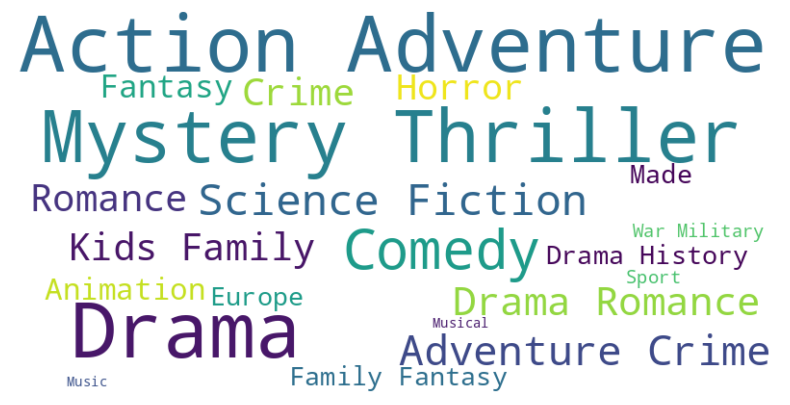

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Combine genre strings from both movie and TV show data
all_genres = " ".join(movie_data1['genre'].astype(str).tolist() + movie_data1['genre'].astype(str).tolist())
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_genres)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

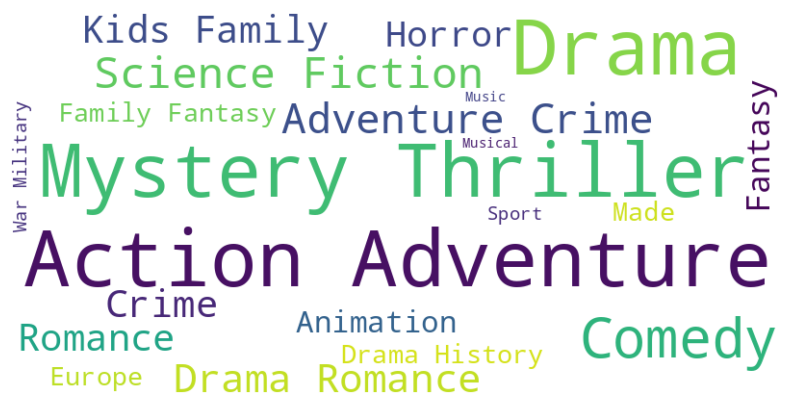

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combining genre strings from both movie and TV show data
all_genres = " ".join(movie_data1['genre'].astype(str).tolist() + movie_data1['genre'].astype(str).tolist())

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_genres)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Assuming top_5movie_genres and top_5tv_genres contain the data you want to visualize
# Concatenating the two Series to get the top genres from both movies and TV shows
top_5_genres_visualize = pd.concat([top_5movie_genres, top_5tv_genres])

# Group by genre and sum the counts to combine movie and TV show counts for each genre
top_5_genres_visualize = top_5_genres_visualize.groupby(level=0).sum().sort_values(ascending=False).head(5)

plt.bar(x=top_5_genres_visualize.index, height=top_5_genres_visualize.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
# Counting Streaming Service
streaming_service_counts = movie_data1['streaming_service'].value_counts().sort_values(ascending=False)
streaming_service_counts

streaming_service
amazonprimevideo                                                                                                                          13
netflix, amazonprimevideo                                                                                                                  9
bookmyshow, amazonprimevideo                                                                                                               9
amazonprimevideo, amazonprimevideo, amazonprimevideo                                                                                       8
amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo                                                                               7
zee5, amazonprimevideo                                                                                                                     6
amazon, amazonprimevideo                                                                                                                   4
jiohotstar, amazonprimevideo                                                                                                               3
netflix, bookmyshow, amazonprimevideo                                                                                                      3
amazon, amazon, amazonprimevideo                                                                                                           3
sonyliv, bookmyshow, amazonprimevideo                                                                                                      2
amazonprimevideo, amazonprimevideo, sonyliv, amazonprimevideo, aha                                                                         2
amazonprimevideo, itunes, amazonprimevideo, amazon, amazonprimevideo, itunes, itunes                                                       2
itunes, zee5, vimoviesandtv, amazonprimevideo, appletverosnow, jiohotstar, itunes, itunes, bookmyshow                                      2
itunes, itunes, itunes, amazonprimevideo                                                                                                   2
amazonprimevideo, amazonprimevideo                                                                                                         2
itunes, amazon, itunes, amazonprimevideo, itunes, bookmyshow                                                                               2
itunes, zee5, itunes, amazonprimevideo, itunes, bookmyshow                                                                                 1
lionsgateplay, appletvlionsgateplay, amazonprimevideo, amazonlionsgateplay, amazon                                                         1
itunes, itunes, bookmyshow, amazonprimevideo, jiohotstar, jiohotstar                                                                       1
itunes, lionsgateplay, appletvlionsgateplay, amazonprimevideo, amazonlionsgateplay, itunes, itunes                                         1
amazonprimevideo, amazonprimevideo, mxplayer, amazonprimevideo, amazonminitv, amazon                                                       1
amazonprimevideo, amazonprimevideo, zee5, amazonprimevideo, amazon                                                                         1
bookmyshow, amazonprimevideo, amazon, amazon                                                                                               1
itunes, netflix, zee5, amazonprimevideo, itunes, amazon, itunes                                                                            1
zee5, amazon, amazonprimevideo                                                                                                             1
itunes, zee5, amazon, amazonprimevideo, itunes, itunes                                                                                     1
itunes, jiohotstar, zee5, amazonprimevideo, itunes, itunes, bookmyshow                                                                     1
amazonprimevideo, itunes, amazonpr

In [ ]:
# Write Your Code here
# Counting Streaming Service
streaming_service_counts = tv_data1['streaming_service'].value_counts().sort_values(ascending=False)
streaming_service_counts

streaming_service
netflix, amazonprimevideo                                                                                                                          24
jiohotstar, amazonprimevideo                                                                                                                       21
amazonprimevideo, amazonprimevideo, amazonprimevideo                                                                                               11
jiohotstar, jiohotstar, amazonprimevideo                                                                                                            5
amazonprimevideo, amazonprimevideo, amazonprimevideo, amazonprimevideo                                                                              5
amazonprimevideo                                                                                                                                    4
altbalaji, amazonprimevideo                                                                                                                         3
mxplayer, amazonminitv, amazonprimevideo                                                                                                            3
appletvplus, appletvplus, amazonprimevideo                                                                                                          2
amazonprimevideo, amazonanimetimes, amazonprimevideo, amazonprimevideo                                                                              2
jiohotstar, netflix, amazonprimevideo                                                                                                               1
vimoviesandtv, amazonprimevideo                                                                                                                     1
appletvplus, appletvplus, appletvplus, amazonprimevideo                                                                                             1
zee5, vimoviesandtv, amazonprimevideo, zee5                                                                                                         1
amazonprimevideo, netflix, amazonanimetimes, amazonprimevideo, amazonprimevideo                                                                     1
amazoncrunchyroll, crunchyroll, amazoncrunchyroll, amazonprimevideo, netflix, crunchyroll                                                           1
amazonprimevideo, lionsgateplay, appletvlionsgateplay, amazonprimevideo, amazonlionsgateplay, amazonprimevideo                                      1
lionsgateplay, appletvlionsgateplay, amazonprimevideo, amazonlionsgateplay                                                                          1
amazoncrunchyroll, crunchyroll, amazoncrunchyroll, amazonprimevideo, netflix                                                                        1
amazonprimevideo, amazoncrunchyroll, crunchyroll, amazoncrunchyroll, amazonprimevideo, netflix, amazonanimetimes, amazonprimevideo, crunchyroll     1
amazoncrunchyroll, amazoncrunchyroll, crunchyroll, amazonprimevideo, netflix, jiohotstar, crunchyroll                                               1
amazonprimevideo, amazoncrunchyroll, netflix, amazonanimetimes, amazonprimevideo, crunchyroll, amazoncrunchyroll, amazonprimevideo, crunchyroll     1
amazonprimevideo, amazonprimevideo, jiohotstar, amazonprimevideo                                                                                    1
justwatchtv, amazonprimevideo                                                                                                                       1
amazonprimevideo, amazonprimevideo, netflix, amazonprimevideo, jiohotstar                                                                           1
amazoncrunchyroll, amazoncrunchyroll, crunchyroll, amazonprimevideo, netflix, crunchyroll                                                           1
manoramamax, amazonmanoramamax, amazonprimevideo                                  

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud, STOPWORDS
# Combine genre strings from both movie and TV show data
all_genres = " ".join(tv_data1['genre'].astype(str).tolist() + tv_data1['genre'].astype(str).tolist())
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_genres)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
final_data.to_csv('Final_Data.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
data_filtered.to_csv('data_filtered.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***